In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras, one_hot
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
LABELS = {
    0: 'SITTING',
    1: 'RUNNING',
    2: 'WALKING',
}

In [ ]:
running_1=pd.read_csv('/content/gdrive/MyDrive/running 1.csv')
walking_1=pd.read_csv('/content/gdrive/MyDrive/walking 1.csv')
laying_1=pd.read_csv('/content/gdrive/MyDrive/sitting 1.csv')

In [ ]:
running_1=(running_1-running_1.min())/(running_1.max()-running_1.min())
walking_1=(walking_1-walking_1.min())/(walking_1.max()-walking_1.min())
laying_1=(laying_1-laying_1.min())/(laying_1.max()-laying_1.min())

In [ ]:
target_laying_1 = np.zeros( (12000, 1) , dtype=np.int32)
laying_1['target'] = target_laying_1

In [ ]:
target_walking_1 = np.ones( (12000, 1) , dtype=np.int32)*2
walking_1['target'] = target_walking_1

In [ ]:
target_running_1 = np.ones( (12000, 1) , dtype=np.int32)
running_1['target'] = target_running_1

In [ ]:
# prepering test dataset
laying_2=pd.read_csv('/content/gdrive/MyDrive/sitting 2.csv')
laying_2 = laying_2.iloc[:12000,]

In [ ]:
running_2 = pd.read_csv('/content/gdrive/MyDrive/running 2.csv')
running_2 = running_2.iloc[:12000,]

In [ ]:
walking_2 = pd.read_csv('/content/gdrive/MyDrive/walking 2.csv')
walking_2 = walking_2.iloc[:12000,]

In [ ]:
running_2=(running_2-running_2.min())/(running_2.max()-running_2.min())
walking_2=(walking_2-walking_2.min())/(walking_2.max()-walking_2.min())
laying_2=(laying_2-laying_2.min())/(laying_2.max()-laying_2.min())

In [ ]:
laying_2['target'] = target_laying_1

In [ ]:
running_2['target'] = target_running_1

In [ ]:
walking_2['target'] = target_walking_1

In [ ]:
print(running_2.shape, walking_2.shape, laying_2.shape, laying_1.shape, walking_1.shape, running_1.shape)

(12000, 5) (12000, 5) (12000, 5) (12000, 5) (12000, 5) (12000, 5)


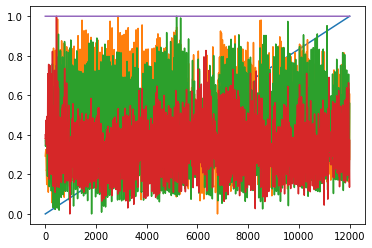

In [ ]:
plt.plot(running_2)

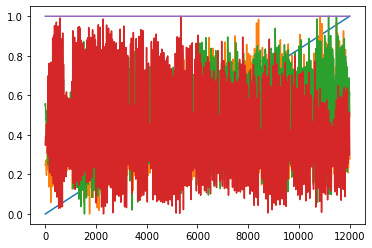

In [ ]:
plt.plot(running_1)

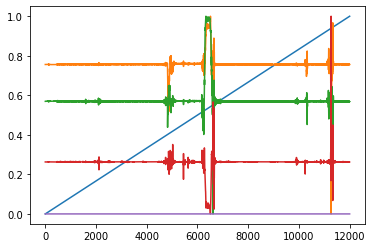

In [ ]:
plt.plot(laying_1)

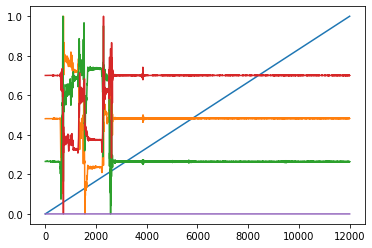

In [ ]:
plt.plot(laying_2)

In [ ]:
rate = 250
def apply_sample_interval (data):
  motion_data = pd.DataFrame()
  for i in range (0 , len(data)-3000, 1):
    data_subset = data.iloc[i:3100 + i][::rate]
    motion_data = motion_data.append(data_subset, ignore_index=True)  
  return motion_data 
 

In [ ]:
running_train = apply_sample_interval(running_1)
walking_train = apply_sample_interval(walking_1)
laying_train = apply_sample_interval(laying_1)

In [ ]:
running_test = apply_sample_interval(running_2)
walking_test = apply_sample_interval(walking_2)
laying_test = apply_sample_interval(laying_2)

In [ ]:
# number of samples = 13 
def getdata(data):
    X,Y=[],[]
    for i in range(0 , len(data)-13, 13):
        X.append(data.iloc[i:i+13 , 1:4] )
        Y.append(data.iloc[i , 4] )
        #Y.append(data[i,-1:])
    Y = tf.one_hot(Y, 3).numpy()    
    return np.array(X) ,np.array(Y)

In [ ]:
xrun1,yrun1=getdata(running_train)
xrun2,yrun2=getdata(running_test)
xwalk1,ywalk1=getdata(walking_train)
xwalk2,ywalk2=getdata(walking_test)
xlay1,ylay1=getdata(laying_train)
xlay2,ylay2=getdata(laying_test)

#x_train , y_train= getdata(data_total_train)
#x_train.shape , y_train.shape

In [ ]:
print(xrun1.shape,xrun2.shape,ywalk1.shape,ywalk2.shape)

(8999, 13, 3) (8999, 13, 3) (8999, 3) (8999, 3)


In [ ]:
X_sit=np.concatenate((xlay1,xlay2),axis=0)
X_walk=np.concatenate((xwalk1,xwalk2),axis=0)
X_run=np.concatenate((xrun1,xrun2),axis=0)
print(X_sit.shape,X_walk.shape,X_run.shape)

(17998, 13, 3) (17998, 13, 3) (17998, 13, 3)


In [ ]:
Y_sit=np.concatenate((ylay1,ylay2),axis=0)

Y_walk=np.concatenate((ywalk1,ywalk2),axis=0)

Y_run=np.concatenate((yrun1,yrun2),axis=0)

print(Y_sit.shape, Y_walk.shape, Y_run.shape)

(17998, 3) (17998, 3) (17998, 3)


In [ ]:
Y_run[2000]

array([0., 1., 0.], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_sit_train, X_sit_test, Y_sit_train, Y_sit_test = train_test_split(X_sit, Y_sit, test_size=0.2, random_state=0)
X_walk_train, X_walk_test, Y_walk_train, Y_walk_test = train_test_split(X_walk, Y_walk, test_size=0.2, random_state=0)
X_run_train, X_run_test, Y_run_train, Y_run_test = train_test_split(X_run, Y_run, test_size=0.2, random_state=0)

print(X_sit_train.shape, X_sit_test.shape, Y_walk_train.shape, Y_walk_test.shape, X_run_train.shape, Y_run_test.shape)

(14398, 13, 3) (3600, 13, 3) (14398, 3) (3600, 3) (14398, 13, 3) (3600, 3)


In [ ]:
X_train= np.concatenate((X_sit_train, X_walk_train, X_run_train), axis=0)
X_test=np.concatenate((X_sit_test, X_walk_test, X_run_test), axis=0)
Y_train= np.concatenate((Y_sit_train, Y_walk_train, Y_run_train), axis=0)
Y_test=np.concatenate((Y_sit_test, Y_walk_test, Y_run_test), axis=0)

In [ ]:
X_train[14397]

array([[0.75619871, 0.5690195 , 0.26307028],
       [0.75646628, 0.5692639 , 0.26322335],
       [0.75637709, 0.5686529 , 0.26204979],
       [0.75646628, 0.5692639 , 0.26337642],
       [0.75637709, 0.5686529 , 0.26352949],
       [0.75682304, 0.56950829, 0.26327437],
       [0.75664466, 0.5693861 , 0.26347846],
       [0.75673385, 0.5688973 , 0.26276412],
       [0.75022297, 0.57549604, 0.26551944],
       [0.70765697, 0.57512945, 0.2822109 ],
       [0.76004504, 0.57146348, 0.26322335],
       [0.75906394, 0.57024149, 0.26281514],
       [0.76049099, 0.57024149, 0.26317232]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN
model=Sequential()
model.add(GRU(20,input_shape=(13,3)))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 20)                1500      
                                                                 
 dense (Dense)               (None, 4)                 84        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
Total params: 1,599
Trainable params: 1,599
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, batch_size=3, epochs=20)

Epoch 1/20
14398/14398 [==============================] - 71s 5ms/step - loss: 0.0200 - accuracy: 0.9563
Epoch 2/20
14398/14398 [==============================] - 77s 5ms/step - loss: 0.0014 - accuracy: 0.9975
Epoch 3/20
14398/14398 [==============================] - 68s 5ms/step - loss: 0.0080 - accuracy: 0.9866
Epoch 4/20
14398/14398 [==============================] - 69s 5ms/step - loss: 0.0210 - accuracy: 0.9674
Epoch 5/20
14398/14398 [==============================] - 68s 5ms/step - loss: 0.0043 - accuracy: 0.9926
Epoch 6/20
14398/14398 [==============================] - 71s 5ms/step - loss: 0.0116 - accuracy: 0.9753
Epoch 7/20
14398/14398 [==============================] - 69s 5ms/step - loss: 0.0016 - accuracy: 0.9975
Epoch 8/20
14398/14398 [==============================] - 68s 5ms/step - loss: 0.0320 - accuracy: 0.9518
Epoch 9/20
14398/14398 [==============================] - 68s 5ms/step - loss: 0.0130 - accuracy: 0.9802
Epoch 10/20
14398/14398 [==============================

In [ ]:
model.evaluate(X_test, Y_test)

338/338 [==============================] - 2s 3ms/step - loss: 0.0148 - accuracy: 0.9771


[0.014822572469711304, 0.9771296381950378]

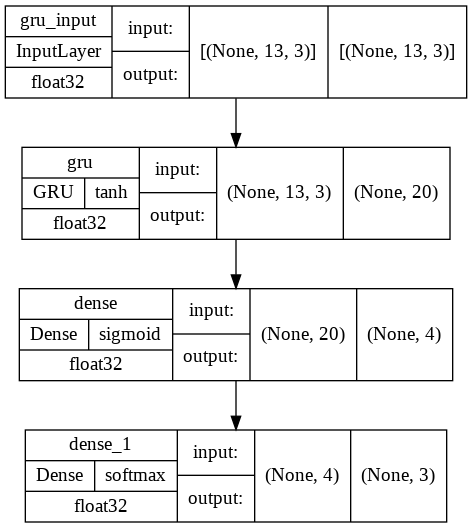

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [ ]:
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model=tf_lite_converter.convert()
tflite_model_name='model_name.tflite'

open(tflite_model_name,"wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpl6kfyj79/assets


INFO:tensorflow:Assets written to: /tmp/tmpl6kfyj79/assets


16592

In [ ]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
#frames = [laying_train , walking_train, running_train]
#data_total_train = pd.concat(frames, ignore_index=True)